In [2]:
import geopandas

from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import netCDF4 as nc

In [4]:
# Create a path to the S3 image

# UNIX
path = Path('/d_drive_data/S3/L2_WFR/S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002.SEN3')
# WIN
# path = Path('D:/S3/L2_WFR/S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002.SEN3')
# path = Path('D:/Images/Download/Sentinel3/S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002.SEN3')
path.exists()

True

In [5]:
# Open the coordinates arrays
ds = nc.Dataset(path/'geo_coordinates.nc')
lat = ds['latitude'][:]
lon = ds['longitude'][:]

In [6]:
# define the polygon (coordinates from the sample GeoJSON example)
polygon = np.array([ [ [ -61.304292937753878, -3.580746157823998, 0.0 ], [ -61.189738482291098, -3.570230611586103, 0.0 ], [ -61.051796038163282, -3.570623959031377, 0.0 ], [ -60.971175020538652, -3.593840244684938, 0.0 ], [ -60.9034262153111, -3.563360680269377, 0.0 ], [ -60.805020782919101, -3.506299406583337, 0.0 ], [ -60.753519094627137, -3.450505864090518, 0.0 ], [ -60.722456984927447, -3.39425947814228, 0.0 ], [ -60.69176635463603, -3.326974300372498, 0.0 ], [ -60.64421466170581, -3.314434177206381, 0.0 ], [ -60.572625051875058, -3.314523058454226, 0.0 ], [ -60.514541318054583, -3.307213505528399, 0.0 ], [ -60.501849367185159, -3.346258308422025, 0.0 ], [ -60.583418632397368, -3.33894030325553, 0.0 ], [ -60.665840030658408, -3.344760708787252, 0.0 ], [ -60.686558678731473, -3.374889635076542, 0.0 ], [ -60.755654470359637, -3.48512230522507, 0.0 ], [ -60.807307277936701, -3.544639712461309, 0.0 ], [ -60.874728354510736, -3.576891855197255, 0.0 ], [ -60.903342826613887, -3.613227458340859, 0.0 ], [ -60.932989587372482, -3.622059697419507, 0.0 ], [ -61.021414925808919, -3.605966358767145, 0.0 ], [ -61.091500853927002, -3.593526609351898, 0.0 ], [ -61.14960696557246, -3.598958178779615, 0.0 ], [ -61.240461667923427, -3.607404228546328, 0.0 ], [ -61.305985273744547, -3.604193025913813, 0.0 ], [ -61.304292937753878, -3.580746157823998, 0.0 ] ] ])
polygon.shape

(1, 27, 3)

In [1]:
polygon[0, :, :2]

NameError: name 'polygon' is not defined

In [8]:
# Just a small refactoring of the old code
def get_x_y(lat_arr, lon_arr, lat, lon):

    grid = np.concatenate([lat_arr[..., None], lon_arr[..., None]], axis=2)
    
    vector = np.array([lat, lon]).reshape(1, 1, -1)
    subtraction = vector - grid 
    dist = np.linalg.norm(subtraction, axis=2)
    result = np.where(dist == dist.min())
    target_x_y = result[0][0], result[1][0]
    
    return target_x_y
    
# considering that creating the 2D grid consumes memory, we will get all coordinates in just one pass
def get_x_y_poly(lat_arr, lon_arr, polyline):
    grid = np.concatenate([lat_arr[..., None], lon_arr[..., None]], axis=2)
    
    # Polyline is a GeoJSON coordinate array
    polyline = polyline.squeeze()
    
    # loop through each vertice
    vertices = []
    for i in range(polyline.shape[0]):
        
        vector = np.array([polyline[i, 1], polyline[i, 0]]).reshape(1, 1, -1)
        subtraction = vector - grid 
        dist = np.linalg.norm(subtraction, axis=2)
        result = np.where(dist == dist.min())
        target_x_y = [result[0][0], result[1][0]]
        
        vertices.append(target_x_y)
    return np.array(vertices)

def bbox(vertices):
    "Get the bounding box of the vertices. Just for visualization purposes"
    ymin = np.min(vertices[:,0])
    ymax = np.max(vertices[:,0])    
    xmin = np.min(vertices[:,1])
    xmax = np.max(vertices[:,1])        
    return xmin, xmax, ymin, ymax


In [9]:
%time get_x_y(lat, lon, -3.580746157823998, -61.304292937753878)

CPU times: user 437 ms, sys: 74.5 ms, total: 512 ms
Wall time: 510 ms


(846, 2339)

In [10]:
%time vertices = get_x_y_poly(lat, lon, polygon)

CPU times: user 10.3 s, sys: 1.66 s, total: 12 s
Wall time: 12 s


In [11]:
vertices

array([[ 846, 2339],
       [ 832, 2386],
       [ 821, 2440],
       [ 823, 2475],
       [ 806, 2499],
       [ 777, 2534],
       [ 754, 2549],
       [ 731, 2556],
       [ 703, 2563],
       [ 695, 2581],
       [ 689, 2609],
       [ 681, 2632],
       [ 695, 2641],
       [ 699, 2607],
       [ 708, 2574],
       [ 721, 2569],
       [ 767, 2552],
       [ 791, 2536],
       [ 808, 2512],
       [ 824, 2504],
       [ 830, 2493],
       [ 831, 2456],
       [ 833, 2426],
       [ 839, 2404],
       [ 850, 2368],
       [ 854, 2342],
       [ 846, 2339]])

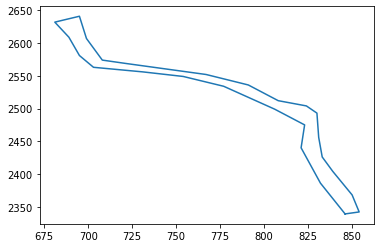

In [12]:
plt.plot(vertices[:,0],vertices[:,1])

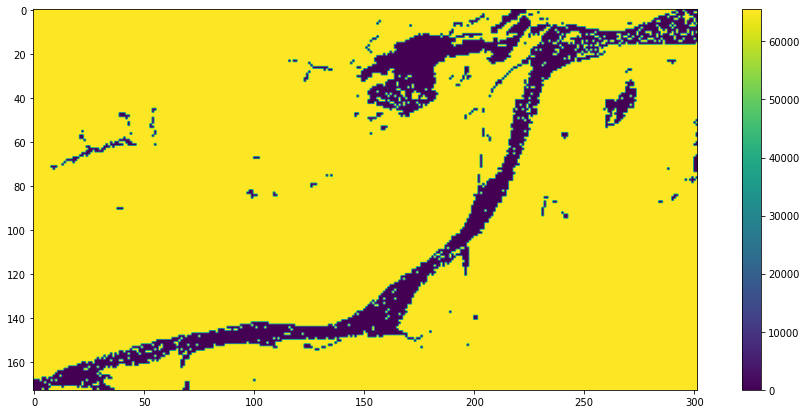

In [31]:
# Open one band
ds = nc.Dataset(path/'Oa17_reflectance.nc')
band = ds['Oa17_reflectance'][:]

xmin, xmax, ymin, ymax = bbox(vertices)

# matplotlib.use('TkAgg')
# matplotlib.use('module://ipykernel.pylab.backend_inline')
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 7]
plt.imshow(band.data[ymin:ymax, xmin:xmax])
plt.colorbar()
plt.show()

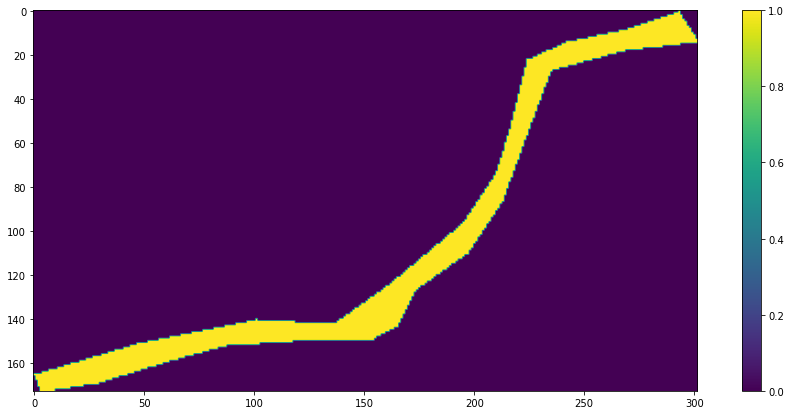

In [32]:
from skimage.draw import polygon
img = np.zeros(band.shape)
rr, cc = polygon(vertices[:,0], vertices[:,1], band.shape)
img[rr, cc] = 1
plt.imshow(img[ymin:ymax, xmin:xmax])
plt.colorbar()

In [33]:
# get the reflectances of the pixels in the polygon.
# do the same for the other bands
reflectances = band[rr, cc]

reflectances.data.shape

(3935,)

In [34]:
reflectances.data[0],rr[0],cc[0]

(0.13177894, 681, 2632)

In [35]:
custom_subset = {'reflectance':reflectances.data,
                 'x':rr,
                 'y':cc}

In [43]:
df = pd.DataFrame(custom_subset)
df.head()

,reflectance,x,y
0,0.131779,681,2632
1,0.094516,682,2630
2,65535.000000,682,2631
3,0.057161,682,2632
4,0.046156,683,2627


In [48]:
# drop outlier values
indexNames = df[df['reflectance'] > 2].index
df.drop(indexNames, inplace=True)

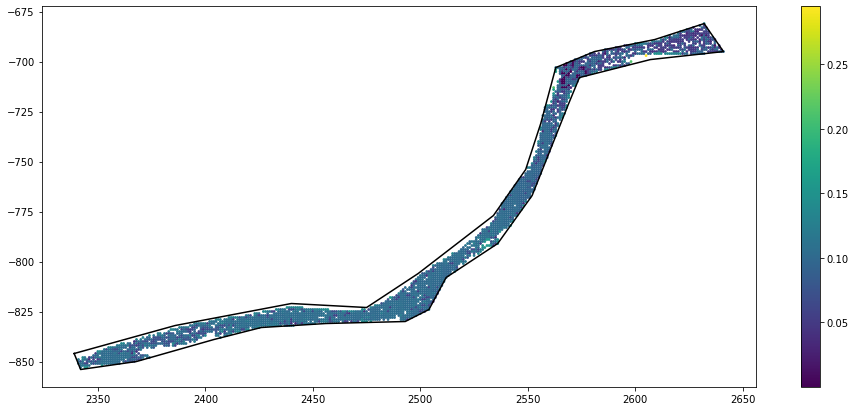

In [49]:
plt.plot(vertices[:,1],vertices[:,0]*-1,c='k')
plt.scatter(df['y'],df['x']*-1,c=df['reflectance'],s=3)
plt.colorbar()

In [40]:
path

PosixPath('/d_drive_data/S3/L2_WFR/S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002.SEN3')